In [31]:
#pip install graphviz

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gv
pd.options.display.float_format = '{:.2f}'.format

DIR = 'C:\\Users\\User\\Notebooks_py\\Hackathon 2022\\'

In [134]:
df = pd.read_csv(f'{DIR}\\2. Новые данные\\statistics-07-20.csv', sep=';')
df.tail()

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,...,operation_st_id,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto
4189910,860009873840005.00,1.00,62827548,76404.00,NaN,NaN,161185.00,1.00,4.00,2020-07-16 03:29:00,...,2001933484.00,5.00,39513543.00,60.00,10.00,76900054.00,860009.00,2001933484.00,NaN,6256.00
4189911,860009873840005.00,1.00,62827548,76404.00,NaN,NaN,161185.00,1.00,4.00,2020-07-16 03:30:00,...,2001933484.00,5.00,39513543.00,60.00,10.00,76900054.00,860009.00,2001933484.00,NaN,6256.00
4189912,830200941862201.00,NaN,62827910,862201.00,NaN,NaN,NaN,2.00,3.00,2020-07-15 20:00:00,...,2001930776.00,4.00,NaN,60.00,10.00,NaN,862201.00,2001930776.00,NaN,1756.00
4189913,NaN,NaN,62827514,968302.00,NaN,NaN,NaN,1.00,80.00,2020-07-16 02:37:00,...,2000038612.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4189914,NaN,1.00,62827514,968302.00,20.00,NaN,161128.00,NaN,21.00,2020-07-16 04:28:00,...,2000038612.00,NaN,98098048.00,60.00,NaN,0.00,NaN,NaN,249.00,NaN


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189915 entries, 0 to 4189914
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   index_train       float64
 1   length            float64
 2   car_number        int64  
 3   destination_esr   float64
 4   adm               float64
 5   danger            float64
 6   gruz              float64
 7   loaded            float64
 8   operation_car     float64
 9   operation_date    object 
 10  operation_st_esr  float64
 11  operation_st_id   float64
 12  operation_train   float64
 13  receiver          float64
 14  rodvag            float64
 15  rod_train         float64
 16  sender            float64
 17  ssp_station_esr   float64
 18  ssp_station_id    float64
 19  tare_weight       float64
 20  weight_brutto     float64
dtypes: float64(19), int64(1), object(1)
memory usage: 671.3+ MB


index_train - Индекс поезда  
length - Длина вагона  
car_number - Номер вагона  
destination_esr - ЕСР станции назначения вагона   
adm - Код АСОУП администрации-собственника вагона  
danger - Признак опасного груза в вагоне. 1 - в вагоне опасный груз,  null - иначе  
gruz - Код груза  
loaded - Признак груженого вагона. 1 -  груженый, 2- порожний  
operation_car - Код операции ВМ АСОУП  
operation_date - Дата операции  
operation_st_esr - ЕСР станции операции  
operation_st_id - ID станции операции  
operation_train - Код операции ПМ АСОУП  
receiver - ОКПО грузополучателя  
rodvag - Род вагона АСОУП (учетного)  
rod_train - Род поезда АСОУП  
sender - ОКПО грузоотправителя  
ssp_station_esr - ЕСР станция ССП  
ssp_station_id - id станции ССП  
tare_weight - Вес тары вагона (ц)  
weight_brutto - weight_brutto  

In [139]:
# сразу добавим ID вагон-станция
# сначала проверим, что id вагона и id станции не меняются по количеству символов
print(df.car_number.apply(lambda x: len(str(x))).nunique())
print()
print(df.operation_st_esr.apply(lambda x: len(str(x))).value_counts())

1

8    4189317
3        598
Name: operation_st_esr, dtype: int64


598 строк со значениями nan во многих столбцах, в т.ч. в operation_st_esr. В остальных случаях номер вагона состоит из 6 цифр, и номер станции из 6 цифр

In [173]:
# на всякий случай сохраним данные с nan
df_nan = df[df.operation_st_esr.isnull()].copy()
# для дальнейшей работы уберем неизвестные станции
df = df[df.operation_st_esr.notnull()]
df['car_st'] = df['car_number']*1000000+df['operation_st_esr'].astype(int)
#df['car_st'] = df['car_number'].astype(str)+'-'+df['operation_st_esr'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4189317 entries, 0 to 4189914
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   index_train       float64
 1   length            float64
 2   car_number        int64  
 3   destination_esr   float64
 4   adm               float64
 5   danger            float64
 6   gruz              float64
 7   loaded            float64
 8   operation_car     float64
 9   operation_date    object 
 10  operation_st_esr  float64
 11  operation_st_id   float64
 12  operation_train   float64
 13  receiver          float64
 14  rodvag            float64
 15  rod_train         float64
 16  sender            float64
 17  ssp_station_esr   float64
 18  ssp_station_id    float64
 19  tare_weight       float64
 20  weight_brutto     float64
 21  car_st            int64  
dtypes: float64(19), int64(2), object(1)
memory usage: 735.1+ MB


In [174]:
df.tail()

,index_train,length,car_number,destination_esr,adm,danger,gruz,loaded,operation_car,operation_date,...,operation_train,receiver,rodvag,rod_train,sender,ssp_station_esr,ssp_station_id,tare_weight,weight_brutto,car_st
4189910,860009873840005.00,1.00,62827548,76404.00,NaN,NaN,161185.00,1.00,4.00,2020-07-16 03:29:00,...,5.00,39513543.00,60.00,10.00,76900054.00,860009.00,2001933484.00,NaN,6256.00,62827548860009
4189911,860009873840005.00,1.00,62827548,76404.00,NaN,NaN,161185.00,1.00,4.00,2020-07-16 03:30:00,...,5.00,39513543.00,60.00,10.00,76900054.00,860009.00,2001933484.00,NaN,6256.00,62827548860009
4189912,830200941862201.00,NaN,62827910,862201.00,NaN,NaN,NaN,2.00,3.00,2020-07-15 20:00:00,...,4.00,NaN,60.00,10.00,NaN,862201.00,2001930776.00,NaN,1756.00,62827910862201
4189913,NaN,NaN,62827514,968302.00,NaN,NaN,NaN,1.00,80.00,2020-07-16 02:37:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62827514968302
4189914,NaN,1.00,62827514,968302.00,20.00,NaN,161128.00,NaN,21.00,2020-07-16 04:28:00,...,NaN,98098048.00,60.00,NaN,0.00,NaN,NaN,249.00,NaN,62827514968302


In [175]:
# ID и ЕСР станции однозначно идетифицируют станцию
len(df[['operation_st_esr', 'operation_st_id']].value_counts()) == \
    len(df['operation_st_esr'].value_counts()) == \
        len(df['operation_st_id'].value_counts())

True

In [176]:
# Приведем дату и время в формат timestamp
df['operation_date'] = pd.to_datetime(df.operation_date)

Временной интервал
Начало: 2020-07-01 00:00:00
Окончание: 2020-07-31 23:59:00


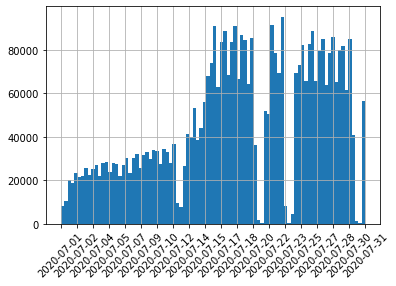

In [177]:
# Считая одну строку в датасете за одну операцию, посмотрим на распределение операций по времени
start, end = df.operation_date.min(), df.operation_date.max()
print(f'Временной интервал\nНачало: {start}\nОкончание: {end}')
df.operation_date.hist(bins=90)
x = pd.date_range(start=start, end=end, periods=20)
plt.xticks(x, rotation = '45')
plt.show()

# Количество операций кратно увеличивается во второй половине месяца
# кроме того, интересны провалы в районе 12-го, 21-го, 23-го и 30-го чисел

In [178]:
# Дополнительные данные
# Расшифровка операций с поездами
train_oper_dict = pd.read_csv(f'{DIR}RZD-hackathon\\VIVSD_ASOUP_NSI_TN_OPER_POEZD.csv')
# Расшифровка операций с вагонами
car_oper_dict = pd.read_csv(f'{DIR}RZD-hackathon\\VIVSD_ASOUP_NSI_TN_OPER_VAG.csv')


def get_train_oper(operation_train):
    try:
        result = train_oper_dict[train_oper_dict.kop==operation_train].mnem_oper.values[0]
    except:
        result = 'UNKNOWN'
    return result

def get_car_oper(operation_car, short=False):
    if short: column_name = 'mnem_oper'
    else: column_name = 'naimen_oper'    
    try:
        result = car_oper_dict[car_oper_dict.kop==operation_car][column_name].values[0]
    except:
        result = 'UNKNOWN'
    return result

In [179]:
for i in range(3,30):
    if i not in range(5,10):
        print(i,get_car_oper(i))

3 ИСКЛЮЧЕНИE ВАГОНА ИЗ ПОЕЗДА           
4 ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              
10 ПОГРУЗКА НА МЕСТАХ ОБЩ.ПОЛЬЗОВАНИЯ    
11 ПОГРУЗКА НА ПП                        
12 ПРИЕМ С НОВОСТРОЙКИ                   
13 ПРИЕМ С ВОДНОГО ТРАНСПОРТА            
14 ПРИЕМ С АВТОТРАНСПОРТА                
15 ПЕРЕГРУЗ ИЗ ВАГОНОВ ИНОСТРАННОЙ Ж.Д.  
16 ПРИЕМ С ИНОСТРАННОЙ Ж.Д.              
17 ПЕРЕГРУЗ С УЗКОЙ КОЛЕИ                
18 ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ        
19 ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ НА ПП  
20 ВЫГРУЗКА НА МЕСТАХ ОБЩ. ПОЛЬЗОВАНИЯ   
21 ВЫГРУЗКА НА ПП                        
22 СДАЧА НА НОВОСТРОЙКУ                  
23 СДАЧА НА ВОДНЫЙ ТРАНСПОРТ             
24 СДАЧА НА АВТОТРАНСПОРТ                
25 ПЕРЕГРУЗ НА ВАГОН ИНОСТР.Ж.Д.         
26 СДАЧА НА ИНОСТРАННУЮ Ж.Д.             
27 ПЕРЕГРУЗ НА УЗКУЮ КОЛЕЮ               
28 ВЫГРУЗКА БЕЗ ЗАЧЕТА В ВЫГРУЗКУ        
29 ПРОЧИЕ, УЧИТЫВАЕМЫЕ КАК ВЫГРУЗКА      


In [180]:
def operations_chain(car_number, operation_st_esr):
    '''
    Функция формирует таблицу с цепочкой операций для вагона car_number на станции operation_st_esr
    '''
    # список операций с этим вагоном на этой станции, упорядоченный по времени
    df_tmp = df[(df.car_number == car_number)&(df.operation_st_esr==operation_st_esr)].sort_values(by='operation_date')
    
    operations_chain = pd.DataFrame()
    
    operations_chain['start_oper_date'] = df_tmp['operation_date'].iloc[:-1].values
    operations_chain['start_oper'] = df_tmp['operation_car'].fillna(-1).iloc[:-1].values
    operations_chain['end_oper_date'] = df_tmp['operation_date'].iloc[1:].values
    operations_chain['end_oper'] = df_tmp['operation_car'].fillna(-1).iloc[1:].values
    operations_chain['duration'] = (operations_chain['end_oper_date'] - operations_chain['start_oper_date'])
    # приведем продолжительность операции к формату часы
    operations_chain['duration'] = (operations_chain['duration']/np.timedelta64(1, 'h')).astype(float)
    return operations_chain

In [181]:
car_number = 55864821
operation_st_esr = 925701.0

chain = operations_chain(car_number, operation_st_esr)
chain

,start_oper_date,start_oper,end_oper_date,end_oper,duration
0,2020-07-02 21:08:00,18.00,2020-07-02 21:39:00,4.00,0.52
1,2020-07-02 21:39:00,4.00,2020-07-02 22:23:00,-1.00,0.73
2,2020-07-02 22:23:00,-1.00,2020-07-04 04:15:00,3.00,29.87
3,2020-07-04 04:15:00,3.00,2020-07-04 04:16:00,80.00,0.02
4,2020-07-04 04:16:00,80.00,2020-07-04 09:46:00,21.00,5.50
...,...,...,...,...,...
156,2020-07-30 05:59:00,3.00,2020-07-30 06:00:00,80.00,0.02
157,2020-07-30 06:00:00,80.00,2020-07-30 12:00:00,21.00,6.00
158,2020-07-30 12:00:00,21.00,2020-07-30 16:06:00,18.00,4.10
159,2020-07-30 16:06:00,18.00,2020-07-30 16:24:00,4.00,0.30


In [217]:
def get_graf(car_st, to_pdf=False):
    '''
    Функция строит граф из цепочек операций с вагоном car_number на станции operation_st_esr
    '''
    
    car_number = int(str(car_st)[:8])
    operation_st_esr = int(str(car_st)[8:])
    
    chain = operations_chain(car_number, operation_st_esr)
    
    g = gv.Digraph(filename=f'graph_{car_number}-{operation_st_esr}')
    g.attr(rankdir='LR', size='9')
       
    for i in range(len(chain)):
        start_oper_num = chain['start_oper'].iloc[i].astype(int)
        start_oper_name = get_car_oper(chain['start_oper'].iloc[i], short=True)
        src = start_oper_num.astype(str)+', '+get_car_oper(chain['start_oper'].iloc[i], short=True)
        
        end_oper_num = chain['end_oper'].iloc[i].astype(int)
        end_oper_name = get_car_oper(chain['end_oper'].iloc[i], short=True)
        trg = end_oper_num.astype(str)+', '+get_car_oper(chain['end_oper'].iloc[i], short=True)
        
        wgt = round(chain['duration'].iloc[i],2).astype(str)
        
        g.edge(src, trg, label=wgt)
        
    display(chain)
    print(f'Вагон №: {car_number}, станция №: {operation_st_esr}\n')
    
    # добавим описание оперций
    print('Расшифровка операций:')
    nodes = list(chain['start_oper'])
    nodes.append(chain['end_oper'].iloc[-1:].values[0])
    for i in list(set(nodes)): print(i,get_car_oper(i))

    if to_pdf: result = g.view()
    else: result = g
    return result

51248896881408    10
73032013980003    10
55724710987708    10
68125368967600    10
56809460987708    10
                  ..
54294202986103     1
54147590986103     1
53456778989205     1
58273335837604     1
59725283985702     1
Name: car_st, Length: 941058, dtype: int64

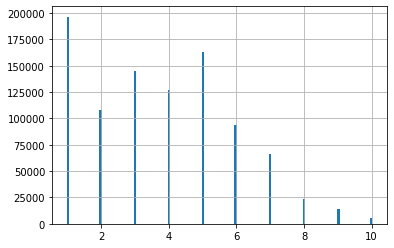

In [279]:
# 10 самых популярных вагонов на станции
df_tmp = df['car_st'].value_counts()[40000:]
df_tmp.hist(bins=142)
df_tmp
#unique, counts = np.unique(df_tmp.values, return_counts=True)
#dict(zip(unique, counts))


,start_oper_date,start_oper,end_oper_date,end_oper,duration
0,2020-07-14 04:18:00,3.00,2020-07-14 04:20:00,80.00,0.03
1,2020-07-14 04:20:00,80.00,2020-07-14 10:10:00,21.00,5.83
2,2020-07-14 10:10:00,21.00,2020-07-14 14:31:00,18.00,4.35
3,2020-07-14 14:31:00,18.00,2020-07-14 14:33:00,4.00,0.03
4,2020-07-14 14:33:00,4.00,2020-07-14 14:52:00,-1.00,0.32
...,...,...,...,...,...
60,2020-07-24 21:38:00,19.00,2020-07-24 21:41:00,81.00,0.05
61,2020-07-24 21:41:00,81.00,2020-07-24 21:42:00,4.00,0.02
62,2020-07-24 21:42:00,4.00,2020-07-24 22:23:00,-1.00,0.68
63,2020-07-24 22:23:00,-1.00,2020-07-25 11:16:00,3.00,12.88


Вагон №: 55514384, станция №: 925701

Расшифровка операций:
3.0 ИСКЛЮЧЕНИE ВАГОНА ИЗ ПОЕЗДА           
4.0 ВКЛЮЧЕНИE ВАГОНА В ПОЕЗД              
80.0  ПОДАЧА ВАГОНА НА ПП                  
81.0 УБОРКА ВАГОНА С ПП                    
18.0 ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ        
19.0 ПОГРУЗКА БЕЗ ЗАЧЕТА В ПОГРУЗКУ НА ПП  
21.0 ВЫГРУЗКА НА ПП                        
-1.0 UNKNOWN


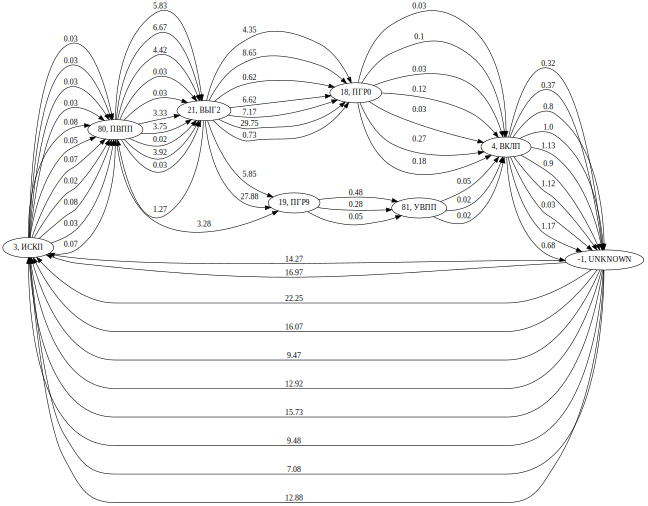

In [281]:
# random
#car_st = 94264926988306

#popular
#car_st = 55864821925701
#car_st = 55864821926206

#middle
car_st = 55514384925701

#rare
#car_st = 51360030831504
#car_st = 73032013980003
#car_st = 55295240954704

get_graf(car_st, to_pdf=False)